# Library&Package Import

In [1]:
import pandas as pd
import numpy as np

## Export the dataset:

In [2]:
dna_df = pd.read_csv("cleaned_codon_usage.csv")
dna_df

,Unnamed: 0,Kingdom,DNAtype,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0,4,0,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,1,4,0,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,2,4,0,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,0.01028,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,3,4,0,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,4,4,0,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12957,12957,2,0,0.02552,0.03555,0.00547,0.01367,0.01276,0.02097,0.00820,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
12958,12958,2,1,0.01258,0.03193,0.01984,0.00629,0.01451,0.05322,0.07644,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
12959,12959,2,1,0.01423,0.03321,0.01661,0.00356,0.01127,0.05042,0.09609,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
12960,12960,2,0,0.01757,0.02028,0.00767,0.01293,0.01319,0.01959,0.00715,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


## Normalization:

In [3]:
from sklearn.preprocessing import MinMaxScaler
y = dna_df['DNAtype']
x = dna_df.drop(columns=['Unnamed: 0','DNAtype','Kingdom'])
scaler = MinMaxScaler( )
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.07611597, 0.13120297, 0.00330404, ..., 0.05553097, 0.01952362,
        0.        ],
       [0.12489646, 0.14799869, 0.00449349, ..., 0.05995575, 0.02655213,
        0.        ],
       [0.09084215, 0.23775766, 0.08967158, ..., 0.08650442, 0.        ,
        0.01349578],
       ...,
       [0.0654855 , 0.36219871, 0.10976013, ..., 0.07876106, 0.04646622,
        0.18903468],
       [0.08085596, 0.22118006, 0.05068394, ..., 0.02190265, 0.03084733,
        0.01462043],
       [0.08182237, 0.40615116, 0.11445186, ..., 0.03451327, 0.04451386,
        0.20253046]])

## PCA:

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)  
x_scaled = pca.fit_transform(x_scaled) 
pca.explained_variance_ratio_

array([0.35063693, 0.20579774, 0.05714541, 0.03743535, 0.0336434 ,
       0.03175275, 0.02082742, 0.01942256, 0.01539008, 0.01363249])

Text(0.5, 1.0, 'Principal component V.S. Percentage of variance explained')

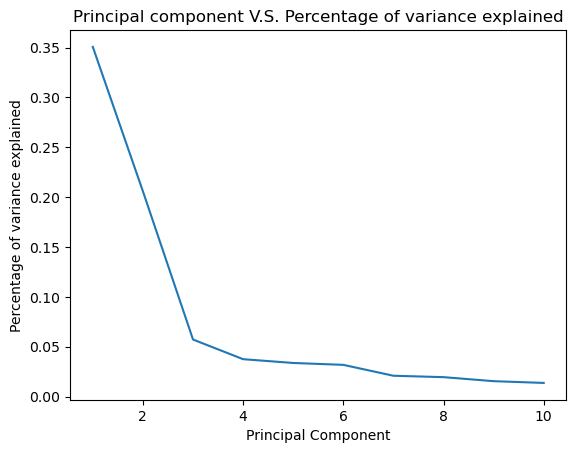

In [5]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.plot(range(1,11),pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Percentage of variance explained')
plt.title('Principal component V.S. Percentage of variance explained')

## Data split:

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state = 100)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(10369, 10) (2593, 10) (10369,) (2593,)


## Cross validation:

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
default_params = {'algorithm':'auto','p':2,'metric':'minkowski','weights':'distance'}
knn_model = KNeighborsClassifier(**default_params)
cv_params = {'n_neighbors':np.linspace(1, 10, 10, dtype=int),'leaf_size':np.linspace(1, 10, 10, dtype=int)}
cv = GridSearchCV(knn_model, cv_params, verbose=2, refit=True, cv=5, n_jobs=-1)
cv.fit(x_train,y_train) 

print('Best params: ', cv.best_params_)
print('Best scores: ', cv.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best params:  {'leaf_size': 1, 'n_neighbors': 4}
Best scores:  0.9910310782755369


## Best model:

In [8]:
best_params = {'algorithm':'auto','p':2,'metric':'minkowski','weights':'distance','leaf_size': 1, 'n_neighbors': 3}
best_model = KNeighborsClassifier(**best_params)
best_model.fit(x_train,y_train)
y_pred1=best_model.predict(x_test)
y_pred1

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1, average='weighted')
recall = recall_score(y_test, y_pred1, average='weighted')
f1_micro = f1_score(y_test, y_pred1, average='micro')
f1_macro = f1_score(y_test, y_pred1, average='macro')
auc = roc_auc_score(y_test, best_model.predict_proba(x_test), multi_class='ovr')
print('accuracy_score: ',accuracy)
print('precision_score: ',precision)
print('recall_score: ',recall)
print('f1_micro: ',f1_micro)
print('f1_macro: ',f1_macro)
print('auc_score: ', auc)

accuracy_score:  0.9919012726571539
precision_score:  0.9919016117143766
recall_score:  0.9919012726571539
f1_micro:  0.9919012726571539
f1_macro:  0.9788090107927635
auc_score:  0.9905754241590893


In [12]:
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion matrix :\n {0}\n'.format(confusion_matrix(y_test, y_pred1)))
print('Classification report :\n {0}'.format(classification_report(y_test, y_pred1)))

Confusion matrix :
 [[1848    0    4]
 [   5  570    4]
 [   5    3  154]]

Classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1852
           1       0.99      0.98      0.99       579
           2       0.95      0.95      0.95       162

    accuracy                           0.99      2593
   macro avg       0.98      0.98      0.98      2593
weighted avg       0.99      0.99      0.99      2593



In [13]:
from sklearn.preprocessing import LabelBinarizer
n_classes = len(np.unique(y))
y_score = best_model.fit(x_train, y_train).predict_proba(x_test)
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(2593, 3)

Text(0, 0.5, 'True Positive Rate')

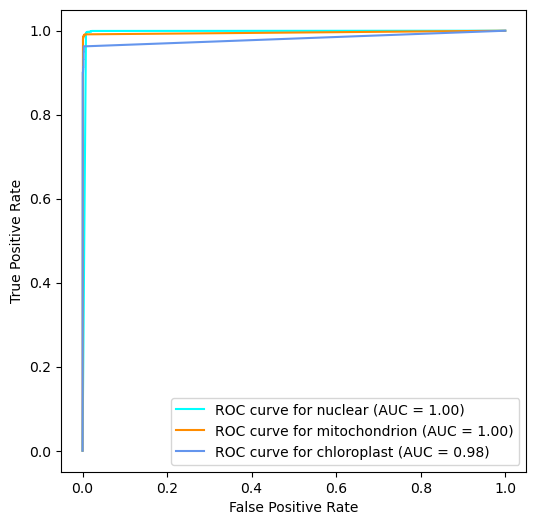

In [14]:
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
fig, ax = plt.subplots(figsize=(6, 6))
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
class_name = ['nuclear', 'mitochondrion', 'chloroplast']
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {class_name[class_id]}",
        color=color,
        ax=ax,
    )
    
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")